<a href="https://colab.research.google.com/github/wsh32/machine_learning/blob/main/modules/01/Assignment_01_Companion_2021f.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Assignment 01 Companion Notebook (Machine Learning: Module 1)

This notebook contains some examples that show off various properties of linear regression.  This notebook is mostly focused on linear regression from a top-down perspective.  That is, we are concerned with how the algorithm behaves-- not how it is implemented.  As such we will be using a built-in solver for linear regression and treating it essentially as a black box.  (you will be opening that black box later in the assignment). (A "black box" is a phrase that means we're going to ignore how things work for now as we investigate the problem. We're just going to be concerned with the inputs and outputs.)

## Numpy Practice

While you will not be doing any programming in this assignment, in order to understand the examples it helps to have at least a little bit of knowledge of `numpy`.  Additionally, we will be using `numpy` extensively in this course.  Please use the code block below to play around a bit with `numpy` (assuming you aren't already well-versed in `numpy`'s use').

In order to help you learn how to use `numpy`, you may consider consulting one of these tutorials.

* [Numpy for MATLAB Users](https://docs.scipy.org/doc/numpy/user/numpy-for-matlab-users.html)
* [Numpy Cheatsheet](https://s3.amazonaws.com/assets.datacamp.com/blog_assets/Numpy_Python_Cheat_Sheet.pdf)

In [1]:
# play around with numpy here
import numpy as np


## Practice making plots
Now's the time to make sure you are comfortable making plots in Python. Please play around with the code below, making sure you know what each line does.

This example is adapted from [the Python Graph Gallery](https://www.python-graph-gallery.com/), which is a great resource.

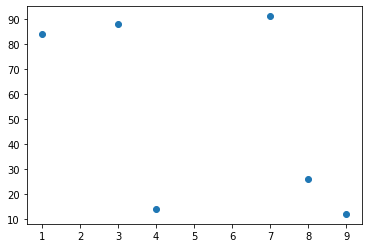

In [2]:
# libraries
import matplotlib.pyplot as plt

# Create a dataset:
x_values=np.array([4,8,1,9,3,7])
y_values=np.array([14,26,84,12,88,91])

# plot
plt.plot(x_values, y_values, linestyle='none', marker='o')
plt.show()

## A Toy Linear Regression Problem

The notion of a toy problem is very useful for validating that a machine learning algorithm is working as it is intended to. A "toy problem" is a very simple version of a more complex problem. Here's an example of a toy linear regression problem.

Suppose you are given a learning algorithm designed to estimate some model parameters $\textbf{w}$ from some training data $(\mathbf{X}, \mathbf{y})$.

1.  Generate values for the model parameters $\mathbf{w}$ (e.g., set them to some known values or generate them randomly).  If you were applying your algorithm to real data, you would of course not know these parameters, but instead estimate them from data.  For our toy problem, we'll proceed with values that we generate so we can test our algorithms.

2.  Generate some training input data, $\mathbf{X}$, (random numbers work well for this).  Generate the training output data, $\mathbf{y}$, by applying the model with parameters $\mathbf{w}$.  For example, for a linear regression problem if $\mathbf{w}$ represents the regression coefficients, then we can generate each training label, $y_i$ as $y_i = \mathbf{x_i}^\top \mathbf{w}$.

3.  Run your learning algorithms on the synthesized training data $(\mathbf{X}, \mathbf{y})$ to arrive at estimated values of the model parameters, $\hat{\mathbf{w}}$.

4.  Compare $\mathbf{w}$ and $\hat{\mathbf{w}}$ as a way of understanding whether your learning algorithm is working.

In the next code block, you'll see an example of a toy regression problem where we set $\mathbf{w} = \begin{bmatrix} 1 \\ 2 \end{bmatrix}$, generate some training data, and then recover $\mathbf{w}$ by applying the linear regression algorithm.

In [8]:
import numpy as np

def linear_regression(X, y):
    # The underscores below are because we are ignoring
    # those values. You might remember this from SoftDes!
    w, _, _, _ = np.linalg.lstsq(X, y, rcond=-1) 
    # Not sure what "np.linalg.lstsq" does? Google it and 
    # read the documentation!
    return w

n_points = 1
X = np.random.randn(n_points,2)
w_true = np.array([1, 2])
y = X.dot(w_true)
w_estimated = linear_regression(X, y)

w_estimated

array([ 0.07331321, -0.03341104])

### *Notebook Exercise 1*

(a)  What should be true about the relationship between `w_true` and `w_estimated` if the algorithm is working properly?

> If the alogrithm works properly (and $\mathbf{y} = \mathbf{X} \cdot \mathbf{w}$), `w_true` and `w_estimated` should be the equal. 

(b)  Are there values of `n_points` that would cause `w_true` to be different from `w_estimated'? (this is a bit tricky, so try some corner cases, values at the extremes, and see if you get a different result.  If you do, try to understand why.)

> `n_points` values of 0 and 1 will cause `w_estimated` to defer from `w_true`. This is because at least 2 points are required to form a line.

#### *Expand for Solution*

***Solution***

(a) These two vectors should be equal since the inferences of the model should match the true parameters.

(b) `n_points = 1` will give you a value for `w_estimated` that doesn't match `w_true`.  This is because them problem is underconstrained (there are more unknowns than equations).  Thus, the linear regression method can find multiple solutions that drive the cost to 0 and has no way of knowing which the correct one was.

### Investigating Noise

One thing you might be interested in knowing is how well the algorithm will work when the data doesn't perfectly conform to the hypothesized model (i.e., $y \neq \mathbf{x}^\top \mathbf{w}$).

In the next code block we'll add some noise to the labels and see if the linear regression algorithm can still reconstruct the true parameters $\mathbf{w}$.  In particular, we are going to add noise generated from a [Gaussian distribution](https://en.wikipedia.org/wiki/Normal_distribution) with a specified standard deviation.  By modifying `noise_standard_deviation`, you can explore how the magnitude of the noise influences the quality of the results (we'll be exploring standard deviation and Gaussians in more detail later in this course).  For now you can just think of `noise_standard_deviation` as controlling the magnitude of corruption applied to the training outputs.  

Additionally, By modifying `n_points` you can change how many training points are available to the linear regression model for parameter estimation.

In [29]:
n_points = 100
noise_standard_deviation = 2
X = np.random.randn(n_points,2)
w_true = np.array([1, 2])
y = X.dot(w_true) + np.random.randn(n_points,) * noise_standard_deviation
w_estimated = linear_regression(X, y)

w_estimated

array([0.95384779, 2.34856218])

### *Notebook Exercise 2*

Please use your plotting skills to plot w_estmated and w_true from above. 

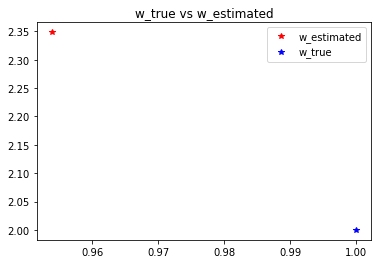

In [39]:
# Write your code here

# Plot w_estimated against w_true. Expected to be on the same point
plt.plot(w_estimated[0], w_estimated[1], 'r*', label='w_estimated')
plt.plot(w_true[0], w_true[1], 'b*', label='w_true')
plt.title("w_true vs w_estimated")
plt.legend()

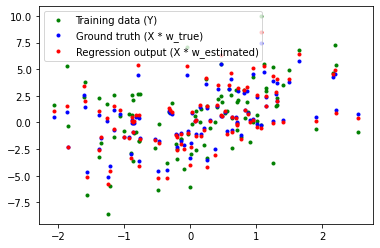

In [57]:
# Plot Y vs X*w_true vs X*w_estimated

plt.plot(X[:,0], y, 'g.', label="Training data (Y)")
plt.plot(X[:,0], X.dot(w_true), 'b.', label="Ground truth (X * w_true)")
plt.plot(X[:,0], X.dot(w_estimated), 'r.', 
         label="Regression output (X * w_estimated)")

plt.legend()

#### *Expand for Solution*

In [ ]:
# plot of w_true vs w_estimated
plt.plot(w_true[0],w_true[1], linestyle='none', marker='o')
plt.plot(w_estimated[0],w_estimated[1], linestyle='none', marker='x')
plt.show()

# Here's another plot to help you think about data and regression
# What is happening in each of these plots?
plt.figure()
plt.plot(X[:,0],y,linestyle='none', marker='o') #Original true values
plt.plot(X[:,0],X[:,0].dot(w_estimated[0]),linestyle='none', marker='x') #Only partial X
plt.plot(X[:,0],X.dot(w_estimated),linestyle='none', marker='*') #Both X components
plt.title('First X axis vs 3 forms of y')
plt.show()

plt.figure()
plt.plot(X[:,1],y,linestyle='none', marker='o')
plt.plot(X[:,1],X[:,1].dot(w_estimated[1]),linestyle='none', marker='x')
plt.plot(X[:,1],X.dot(w_estimated),linestyle='none', marker='*')
plt.title('Second X axis vs 3 forms of y')
plt.show()

### *Notebook Exercise 3*

(a)  Keeping `noise_standard_deviation` constant, investigate (qualitatively) the relationship between `n_points` and how close `w_estimated` is to `w_true`. Why do you think this is the case (you don't have the formal language to describe this yet, so try to give a conceptual argument)?

(b)  Keeping `n_points` constant, characterize qualitatively the relationship between `noise_standard_deviation` and how close `w_estimated` is to `w_true`? Why do you think this is the case (you don't have the formal language to describe this yet, so try to give a conceptual argument)?

#### *Expand for Solution*

***Solution***

(a) as `n_points` gets higher `w_estimated` gets closer to `w_true`.  This makes sense intuitively since the random noise added to the training outputs `y` gets averaged out as more training poitns are provided.

(b)  as `noise_standard_deviation` gets higher `w_estimated` gets farther from `w_true`.  This makes sense intuitively since the random noise added to each to  training output is greater and thus has the parameter estimates from linear regression are noisier as well.

### Adding a y-intercept (bias) term

The beautiful thing about linear regression is that we can make it work for non-linear functions quite easily.  The easiest way to do this is by augmenting the input data with additional features.  In this way, functions that are non-linear in the original input space become linear in the augmented space.

For instance, the function $\mathbf{w}^\top \mathbf{x} + b$ (where $b$ is a scalar or bias term) is non-linear (We know it looks linear but it is actually affine.  If you are not convinced, you can test it against the properties of a [linear map](https://en.wikipedia.org/wiki/Linear_map)).  On the other hand if we construct the vectors $\mathbf{\tilde{x}} = \begin{bmatrix} \mathbf{x} \\ 1 \end{bmatrix}$ and $\mathbf{\tilde{w}} = \begin{bmatrix} \mathbf{w} \\ b \end{bmatrix}$, then $\mathbf{w}^\top \mathbf{x} + b = \mathbf{\tilde{w}}^\top \mathbf{\tilde{x}}$ where $\mathbf{\tilde{w}}^\top \mathbf{\tilde{x}}$ is now a linear function!

In the code block below, you'll see how this idea can be used to fit a linear regression model to model with a bias term.

In [ ]:
b = 3
y = X.dot(w_true) + b
linear_regression(np.hstack((X, np.ones((X.shape[0],1)))), y)

## One more thing

You've almost completed your first Machine Learning assignment! Be sure to fill out the survey in Canvas, and then you'll be all done!